In [1]:
import os,sys
import numpy as np
os.environ["R_HOME"]="/".join(
    np.array(sys.executable.split("/"))[:-2]
)+"/lib/R/"

import scFates as scf

In [2]:
adata=scf.datasets.morarach20()

In [3]:
import scanpy as sc
sc.pp.normalize_total(adata,target_sum=1e6)
sc.pp.log1p(adata,base=10)

In [4]:
scf.tl.tree(adata,Nodes=50,device="gpu",method="ppt",use_rep="X_umap",seed=42,ppt_sigma=.8,ppt_lambda=10)

inferring a principal tree --> parameters used 
    50 principal points, sigma = 0.8, lambda = 10, metric = euclidean
    fitting: 100%|██████████| 50/50 [00:09<00:00,  5.02it/s]
    inference not converged (error: 0.06055461832030374)
    finished (0:00:14) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


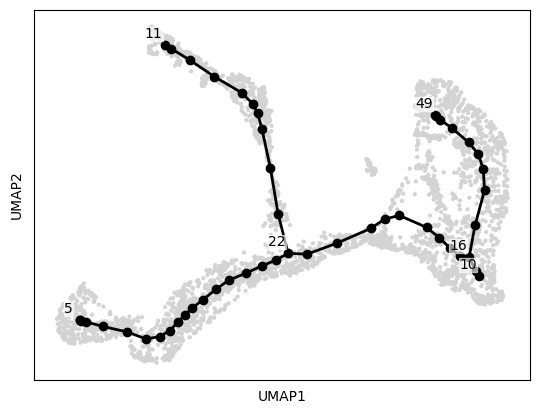

In [5]:
scf.pl.graph(adata)

In [6]:
scf.tl.root(adata,10)

node 10 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [7]:
scf.tl.pseudotime(adata)

projecting cells onto the principal graph
    finished (0:00:02) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [13]:
import time
start = time.time()    
scf.tl.test_association(adata,n_jobs=40,A_cut=.1)
end = time.time()

test features for association with the trajectory
    single mapping : 100%|██████████| 16934/16934 [02:08<00:00, 131.76it/s]
    found 8225 significant features (0:02:08) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [9]:
import numpy as np

In [15]:
duration_scFates=end-start
duration_stream=float(np.loadtxt("STREAM_duration.txt"))

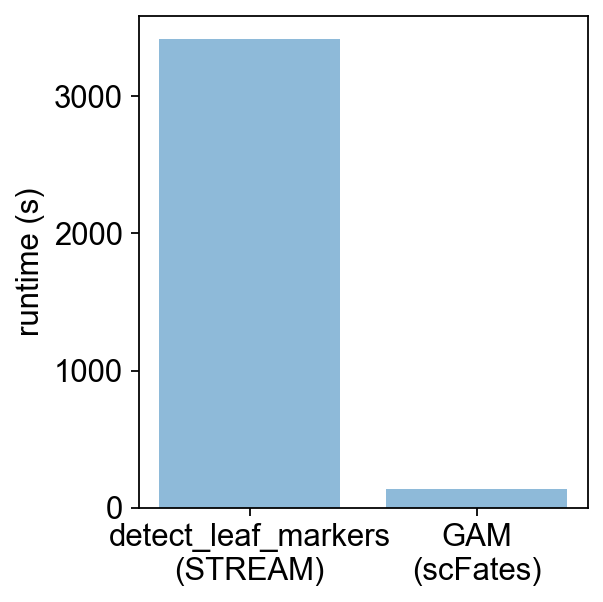

In [18]:
import matplotlib.pyplot as plt
sc.set_figure_params()
fig, ax = plt.subplots()
ax.bar(range(2),[duration_stream,duration_scFates], align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel("runtime (s)")
ax.set_xticks([0,1])
ax.set_xticklabels(["detect_leaf_markers\n(STREAM)",
                              "GAM\n(scFates)"])
ax.grid(False)
# Save the figure and show
plt.tight_layout()
plt.savefig("figures/STREAM_feature_runtime.pdf")

In [29]:
import pandas as pd
signi_stream=pd.read_csv("STREAM_signi.csv",index_col=0).index

In [30]:
signi_gam=adata.var_names[adata.var.signi]

In [38]:
common=len(np.intersect1d(signi_stream,signi_gam))

spe_stream=len(signi_stream)-common
spe_gam=len(signi_gam)-common

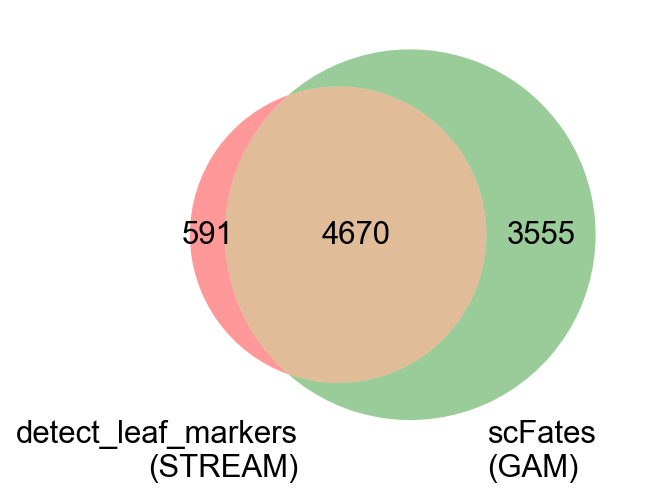

In [47]:
from matplotlib_venn import venn2
scf.set_figure_pubready()
import numpy as np
import igraph
import matplotlib
import matplotlib.pyplot as plt
sc.set_figure_params()
fig,ax=plt.subplots(figsize=(4,3),constrained_layout=True)

# Use the venn2 function
venn2(subsets = (spe_stream,spe_gam, common),set_labels=None,ax=ax)
ax.annotate('scFates\n(GAM)', xy=(.7,-.05),xycoords="axes fraction",ha="left")
ax.annotate("detect_leaf_markers\n(STREAM)", xy=(.3,-.05),xycoords="axes fraction",ha="right")
#ax.set_title("Overlap of significant features\n(based on scFates tree)")
plt.savefig("figures/STREAM_overlap.pdf",dpi=300)

In [52]:
len(signi_stream)/8225

0.6396352583586626

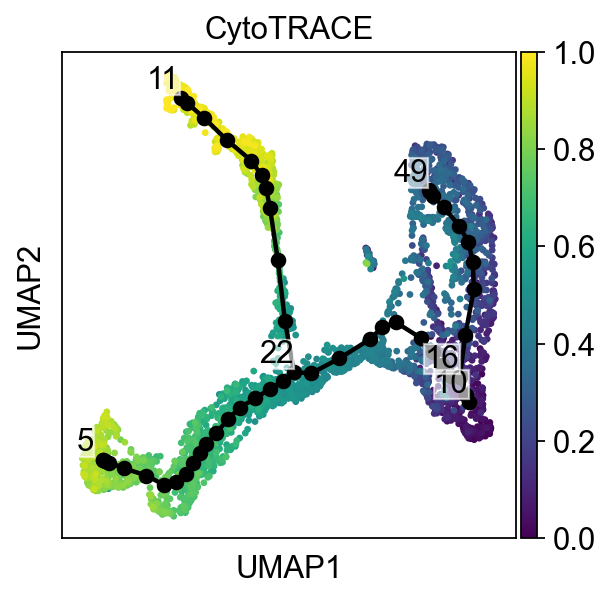

In [49]:
scf.pl.graph(adata,color_cells="CytoTRACE")

In [50]:
adata

AnnData object with n_obs × n_vars = 3217 × 16934
    obs: 'bcs', 'metadata', 'leiden', 'CytoTRACE', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'S_score', 'G2M_score', 'phase', 'clusters_gradients', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 't', 'seg', 'edge', 'milestones'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'p_val', 'A', 'fdr', 'st', 'signi'
    uns: 'log1p', 'graph', 'ppt', 'pseudotime_list', 'milestones_colors', 'seg_colors', 'stat_assoc_list'
    obsm: 'X_pca', 'X_umap', 'velocity_umap', 'X_R'